In [1]:
import PIL
import PIL.ImageDraw
import random


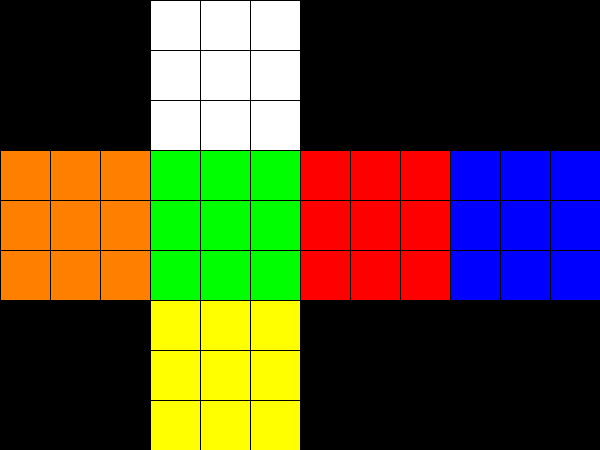

In [9]:
class RubkisCube:
    def __init__(self, moves_nr=0):
        self.cube = {"U":[['W', 'W', 'W'], ['W', 'W', 'W'], ['W', 'W', 'W']],
            "L":[['O', 'O', 'O'], ['O', 'O', 'O'], ['O', 'O', 'O']],
            "F":[['G', 'G', 'G'], ['G', 'G', 'G'], ['G', 'G', 'G']],
            "R":[['R', 'R', 'R'], ['R', 'R', 'R'], ['R', 'R', 'R']],
            "B":[['B', 'B', 'B'], ['B', 'B', 'B'], ['B', 'B', 'B']],
            "D":[['Y', 'Y', 'Y'], ['Y', 'Y', 'Y'], ['Y', 'Y', 'Y']]
        }
        self.shuffle(moves_nr)
        
    def __str__(self):
        string = ""
        for face in self.cube.values():
            for row in face:
                for square in row:
                    string+=square
        return string
    '''
    def get_color(self, color: str):
        match color:
            case "R":
                return (255,0,0)
            case "G":
                return (0,255,0)
            case "B":
                return (0,0,255)
            case "W":
                return (255,255,255)
            case "Y":
                return (255,255,0)
            case "O":
                return (255,128,0)
    '''
    def get_color(self, color: str):
        if color == "R":
            return (255,0,0)
        elif color == "G":
            return (0,255,0)
        elif color == "B":
            return (0,0,255)
        elif color == "W":
            return (255,255,255)
        elif color == "Y":
            return (255,255,0)
        elif color == "O":
            return (255,128,0)
             
    def draw_cube(self):
        square_size = 50
        im = PIL.Image.new(mode="RGB", size=(square_size*12,square_size*9))
        draw = PIL.ImageDraw.Draw(im)

        positions = {
            "U": (3, 0),
            "L": (0, 3),
            "F": (3, 3),
            "R": (6, 3),
            "B": (9, 3),
            "D": (3, 6) 
        }

        for side, pos in positions.items():
            base_x, base_y = pos[0] * square_size, pos[1] * square_size
            
            for row in range(3):
                for col in range(3):
                    color = self.get_color(self.cube[side][row][col])

                    x1 = base_x + (col * square_size)
                    y1 = base_y + (row * square_size)
                    x2 = x1 + square_size
                    y2 = y1 + square_size
                    
                    draw.rectangle(
                        xy=(x1, y1, x2, y2),
                        fill=color,
                        outline=(0, 0, 0)
                    )
        #im.show()
        return im
    
    def rotate(self, move: str):
        face = move[0]
        direction = "CCW" if "'" in move else "CW"
        
        old_face = [row[:] for row in self.cube[face]]
        for i in range(3):
            for j in range(3):
                if direction == "CW":
                    self.cube[face][j][2-i] = old_face[i][j]
                elif direction == "CCW":
                    self.cube[face][2-j][i] = old_face[i][j]

        if face == "U":
            if direction == "CW":
                temp = self.cube["L"][0][:]
                self.cube["L"][0] = self.cube["F"][0][:]
                self.cube["F"][0] = self.cube["R"][0][:]
                self.cube["R"][0] = self.cube["B"][0][:]
                self.cube["B"][0] = temp
            elif direction == "CCW":
                temp = self.cube["L"][0][:]
                self.cube["L"][0] = self.cube["B"][0][:]
                self.cube["B"][0] = self.cube["R"][0][:]
                self.cube["R"][0] = self.cube["F"][0][:]
                self.cube["F"][0] = temp

        elif face == "D":
            if direction == "CW":
                temp = self.cube["L"][2][:]
                self.cube["L"][2] = self.cube["B"][2][:]
                self.cube["B"][2] = self.cube["R"][2][:]
                self.cube["R"][2] = self.cube["F"][2][:]
                self.cube["F"][2] = temp
            elif direction == "CCW":
                temp = self.cube["L"][2][:]
                self.cube["L"][2] = self.cube["F"][2][:]
                self.cube["F"][2] = self.cube["R"][2][:]
                self.cube["R"][2] = self.cube["B"][2][:]
                self.cube["B"][2] = temp

        elif face == "F":
            if direction == "CW":
                temp = self.cube["U"][2][:]
                self.cube["U"][2] = [self.cube["L"][2][2], self.cube["L"][1][2], self.cube["L"][0][2]]
                self.cube["L"][0][2], self.cube["L"][1][2], self.cube["L"][2][2] = self.cube["D"][0][:]
                self.cube["D"][0] = [self.cube["R"][2][0], self.cube["R"][1][0], self.cube["R"][0][0]]
                self.cube["R"][0][0], self.cube["R"][1][0], self.cube["R"][2][0] = temp
            elif direction == "CCW":
                temp = self.cube["U"][2][:]
                self.cube["U"][2] = [self.cube["R"][0][0], self.cube["R"][1][0], self.cube["R"][2][0]]
                self.cube["R"][0][0], self.cube["R"][1][0], self.cube["R"][2][0] = self.cube["D"][0][::-1]
                self.cube["D"][0] = [self.cube["L"][0][2], self.cube["L"][1][2], self.cube["L"][2][2]]
                self.cube["L"][0][2], self.cube["L"][1][2], self.cube["L"][2][2] = temp[::-1]

        elif face == "B":
            if direction == "CW":
                temp = self.cube["U"][0][:]
                self.cube["U"][0] = [self.cube["R"][0][2], self.cube["R"][1][2], self.cube["R"][2][2]]
                self.cube["R"][0][2], self.cube["R"][1][2], self.cube["R"][2][2] = self.cube["D"][2][::-1]
                self.cube["D"][2] = [self.cube["L"][0][0], self.cube["L"][1][0], self.cube["L"][2][0]]
                self.cube["L"][0][0], self.cube["L"][1][0], self.cube["L"][2][0] = temp[::-1]
            elif direction == "CCW":
                temp = self.cube["U"][0][:]
                self.cube["U"][0] = [self.cube["L"][2][0], self.cube["L"][1][0], self.cube["L"][0][0]]
                self.cube["L"][0][0], self.cube["L"][1][0], self.cube["L"][2][0] = self.cube["D"][2][:]
                self.cube["D"][2] = [self.cube["R"][2][2], self.cube["R"][1][2], self.cube["R"][0][2]]
                self.cube["R"][0][2], self.cube["R"][1][2], self.cube["R"][2][2] = temp

        elif face == "L":
            if direction == "CW":
                temp = [self.cube["U"][i][0] for i in range(3)]
                for i in range(3): self.cube["U"][i][0] = self.cube["B"][2-i][2]
                for i in range(3): self.cube["B"][i][2] = self.cube["D"][2-i][0]
                for i in range(3): self.cube["D"][i][0] = self.cube["F"][i][0]
                for i in range(3): self.cube["F"][i][0] = temp[i]
            elif direction == "CCW":
                temp = [self.cube["U"][i][0] for i in range(3)]
                for i in range(3): self.cube["U"][i][0] = self.cube["F"][i][0]
                for i in range(3): self.cube["F"][i][0] = self.cube["D"][i][0]
                for i in range(3): self.cube["D"][i][0] = self.cube["B"][2-i][2]
                for i in range(3): self.cube["B"][i][2] = temp[2-i]

        elif face == "R":
            if direction == "CW":
                temp = [self.cube["U"][i][2] for i in range(3)]
                for i in range(3): self.cube["U"][i][2] = self.cube["F"][i][2]
                for i in range(3): self.cube["F"][i][2] = self.cube["D"][i][2]
                for i in range(3): self.cube["D"][i][2] = self.cube["B"][2-i][0]
                for i in range(3): self.cube["B"][i][0] = temp[2-i]
            elif direction == "CCW":
                temp = [self.cube["U"][i][2] for i in range(3)]
                for i in range(3): self.cube["U"][i][2] = self.cube["B"][2-i][0]
                for i in range(3): self.cube["B"][i][0] = self.cube["D"][2-i][2]
                for i in range(3): self.cube["D"][i][2] = self.cube["F"][i][2]
                for i in range(3): self.cube["F"][i][2] = temp[i]

    def shuffle(self, moves=50):
        for _ in range(moves):
            move = random.choice(["F","R","U","B","L","D","F'","R'","U'","B'","L'","D'"])
            self.rotate(move)
        return self
    
    def check_score(self):
        return sum(sum(row.count(face[1][1]) for row in face) for face in self.cube.values())
    
temp = RubkisCube()
#temp.shuffle()
temp.draw_cube()

In [ ]:
'''import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from collections import deque

class RubiksCubeEnv:
    def __init__(self):
        self.cube = RubkisCube()
        self.actions = ["F", "F'", "R", "R'", "U", "U'", "B", "B'", "L", "L'", "D", "D'"]
    
    def reset(self):
        self.cube = RubkisCube()
        self.cube.shuffle(10)  # Start from a shuffled state
        return self.get_state()
    
    def get_state(self):
        return np.array([ord(c) for c in str(self.cube)]).reshape(-1, 1) / 255.0  # Normalize state
    
    def step(self, action):
        self.cube.rotate(self.actions[action])
        new_state = self.get_state()
        reward = self.get_reward()
        done = reward == 54  # Fully solved cube
        return new_state, reward, done
    
    def get_reward(self):
        return self.cube.check_score()  # Higher score means closer to solving

def build_dqn():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(54, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(12, activation='linear')  # 12 possible moves
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

class DQNAgent:
    def __init__(self):
        self.env = RubiksCubeEnv()
        self.model = build_dqn()
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, 11)  # Random move
        q_values = self.model.predict(state, verbose=0)
        return np.argmax(q_values[0])

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def train(self, episodes=1000):
        for e in range(episodes):
            state = self.env.reset()
            state = np.reshape(state, [1, 54, 1])
            for _ in range(50):  # Max 50 moves per episode
                action = self.act(state)
                next_state, reward, done = self.env.step(action)
                next_state = np.reshape(next_state, [1, 54, 1])
                self.remember(state, action, reward, next_state, done)
                state = next_state
                if done:
                    print(f"Episode {e+1}: Solved!")
                    break
            self.replay()

agent = DQNAgent()
agent.train(episodes=1)
'''